<a href="https://colab.research.google.com/github/abishekabi/amber-detector/blob/main/car_models_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import torch.utils.data as data
import fastai
print('fastai version: ',fastai.__version__)
import torchvision.models
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data/StanfordNeuralNetwork


In [16]:
# !unzip data.zip

In [29]:
!ls car_data/car_data

test  train


In [38]:
!ls

anno_test.csv	Car-Models-Classifier	     names.csv
anno_train.csv	car_models_classifier.ipynb  StanfordNeuralNetwork
car_data	data.zip


pytorch version:  1.7.0+cu101
fastai version:  1.0.61


In [46]:
img_dir = 'car_data'
path = Path(img_dir)
path.ls()

[PosixPath('car_data/car_data')]

In [47]:
data = ImageDataBunch.from_folder(f'{path}',valid_pct = 0.2,size = 224,bs = 64).normalize(imagenet_stats)

In [48]:
for classes, numbers in enumerate(data.classes[:15]):
    print(classes,':',numbers)
len(data.classes),data.c

0 : AM General Hummer SUV 2000
1 : Acura Integra Type R 2001
2 : Acura RL Sedan 2012
3 : Acura TL Sedan 2012
4 : Acura TL Type-S 2008
5 : Acura TSX Sedan 2012
6 : Acura ZDX Hatchback 2012
7 : Aston Martin V8 Vantage Convertible 2012
8 : Aston Martin V8 Vantage Coupe 2012
9 : Aston Martin Virage Convertible 2012
10 : Aston Martin Virage Coupe 2012
11 : Audi 100 Sedan 1994
12 : Audi 100 Wagon 1994
13 : Audi A5 Coupe 2012
14 : Audi R8 Coupe 2012


(196, 196)

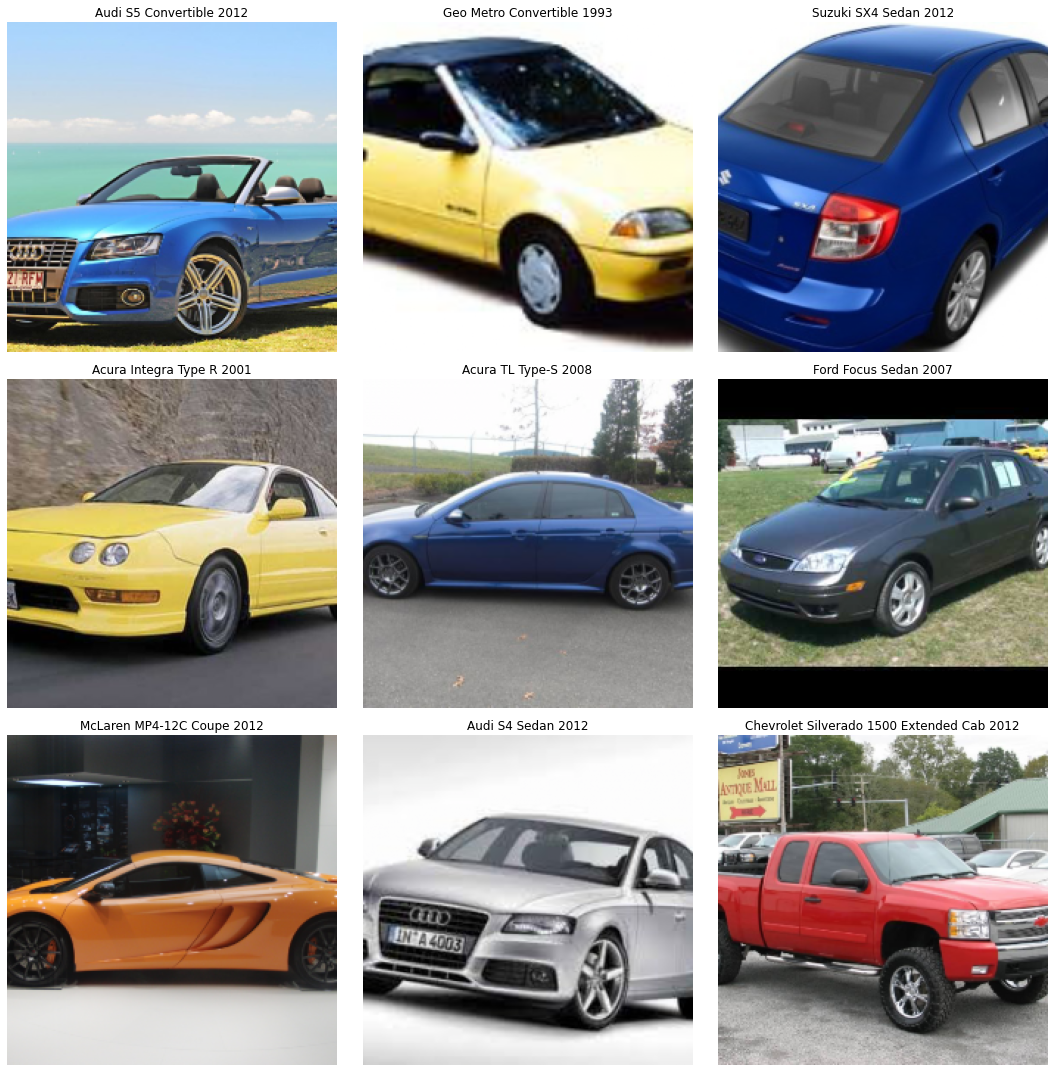

In [49]:
data.show_batch(rows = 3,figsize = (15,15))

In [52]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [53]:
learn.fit_one_cycle(6)

In [ ]:
learn.recorder.plot()

In [54]:
learn.save('cycle-1')

In [55]:
learn.unfreeze()
learn.fit_one_cycle(6)

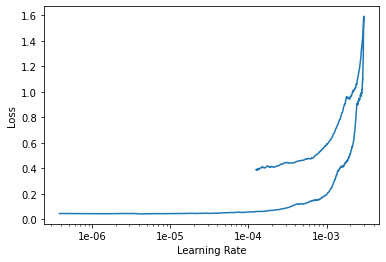

In [58]:
learn.recorder.plot()

In [56]:
learn.save('cycle-2',return_path=True)

PosixPath('/tmp/model/cycle-2.pth')

In [62]:
learn.export('./export.pkl')

In [154]:
!ls -la car_data/

total 201670
drwx------ 4 root root      4096 Dec 16 02:36 car_data
-rw------- 1 root root 103252712 Dec 16 04:02 export.pkl
-rw------- 1 root root 103252615 Dec 16 05:26 first_model.pkl


In [68]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

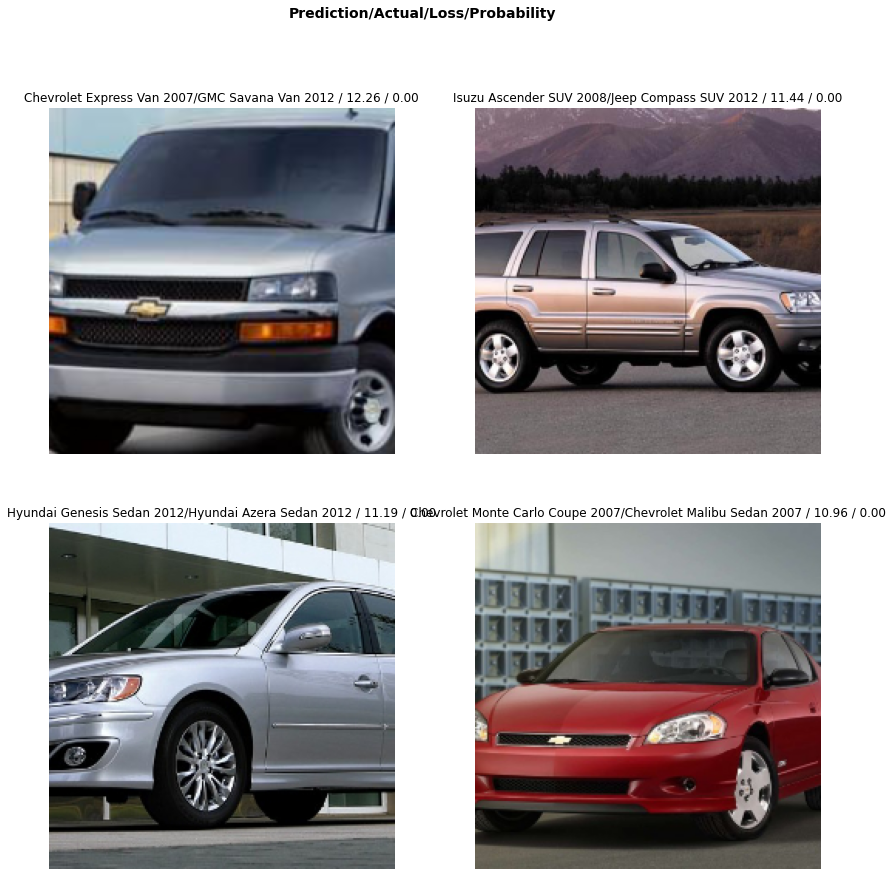

In [69]:
interp.plot_top_losses(4, figsize=(14,14),heatmap=False)

In [70]:
interp.most_confused(min_val=2)

[('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 7),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  6),
 ('Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin Virage Convertible 2012',
  5),
 ('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 5),
 ('Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 5),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 4),
 ('BMW 6 Series Convertible 2007', 'BMW M6 Convertible 2010', 4),
 ('Bentley Continental GT Coupe 2007', 'Bentley Continental GT Coupe 2012', 4),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009', 4),
 ('Chevrolet Corvette Convertible 2012', 'Chevrolet Corvette ZR1 2012', 4),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 4),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 4),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Acura RL Sedan

In [71]:
input, target = learn.get_preds()

In [72]:
print (top_k_accuracy(input=input, targs=target,k=1))

tensor(0.8628)


In [73]:
print (top_k_accuracy(input=input, targs=target,k=3))

tensor(0.9608)


In [128]:
!head StanfordNeuralNetwork/car_labels.csv

﻿filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,label_num,test,label
000001.jpg,112,7,853,717,1,FALSE,﻿'AM General Hummer SUV 2000'
000002.jpg,48,24,441,202,1,FALSE,﻿'AM General Hummer SUV 2000'
000003.jpg,7,4,277,180,1,FALSE,﻿'AM General Hummer SUV 2000'
000004.jpg,33,50,197,150,1,FALSE,﻿'AM General Hummer SUV 2000'
000005.jpg,5,8,83,58,1,FALSE,﻿'AM General Hummer SUV 2000'
000006.jpg,10,6,250,110,1,FALSE,﻿'AM General Hummer SUV 2000'
000007.jpg,56,1,394,176,1,FALSE,﻿'AM General Hummer SUV 2000'
000008.jpg,1,13,113,83,1,FALSE,﻿'AM General Hummer SUV 2000'
000009.jpg,15,111,271,272,1,FALSE,﻿'AM General Hummer SUV 2000'


In [126]:
#!ls StanfordNeuralNetwork/car_ims/002620.jpg
!cat StanfordNeuralNetwork/car_labels.csv|grep 002620.jpg

002620.jpg,31,89,296,187,33,FALSE,'BMW X6 SUV 2012'


In [135]:
interp.data.dl

<bound method DataBunch.dl of ImageDataBunch;

Train: LabelList (12948 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000
Path: car_data;

Valid: LabelList (3237 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hyundai Veracruz SUV 2012,Rolls-Royce Phantom Sedan 2012,Audi A5 Coupe 2012,Mercedes-Benz C-Class Sedan 2012,Cadillac CTS-V Sedan 2012
Path: car_data;

Test: None>

In [ ]:
for_pred = ImageDataBunch.
from_folder(size = 224,bs = 64).normalize(imagenet_stats)

In [ ]:
for classes, numbers in enumerate(data.classes[:15]):
    print(classes,':',numbers)
len(data.classes),data.c

0 : AM General Hummer SUV 2000
1 : Acura Integra Type R 2001
2 : Acura RL Sedan 2012
3 : Acura TL Sedan 2012
4 : Acura TL Type-S 2008
5 : Acura TSX Sedan 2012
6 : Acura ZDX Hatchback 2012
7 : Aston Martin V8 Vantage Convertible 2012
8 : Aston Martin V8 Vantage Coupe 2012
9 : Aston Martin Virage Convertible 2012
10 : Aston Martin Virage Coupe 2012
11 : Audi 100 Sedan 1994
12 : Audi 100 Wagon 1994
13 : Audi A5 Coupe 2012
14 : Audi R8 Coupe 2012


(196, 196)

In [98]:
# 5|from PIL import Image
# im_pred = Image.open("StanfordNeuralNetwork/car_ims/002620.jpg")

In [102]:
im_pred=open_image("StanfordNeuralNetwork/car_ims/002620.jpg")

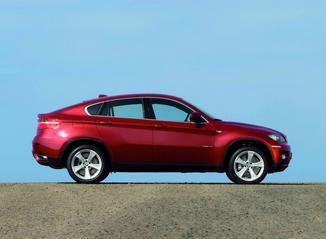

In [103]:
im_pred

In [92]:
im_pred = np.asarray(im_pred)

In [94]:
im_pred.shape

(239, 326, 3)

In [ ]:
from PIL import Image as PImage
from fastai.vision import *

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
pil_im = PImage.fromarray(frame) 
x = pil2tensor(pil_im ,np.float32)
preds_num = learn.predict(Image(x))[2].numpy()

In [151]:
pred_class, pred_idx, outputs = learn.predict(im_pred)

In [142]:
x,y = next(iter(learn.data.valid_dl))

In [147]:
x[0].shape

torch.Size([3, 224, 224])

In [ ]:
def process_image(image):
    
    # Process a PIL image for use in a PyTorch model

    # Converting image to PIL image using image file path
    pil_im = Image.open(f'{image}' + '.jpg')

    # Building image transform
    transform = transforms.Compose([transforms.Resize((244,244)),
                                    #transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                         [0.229, 0.224, 0.225])]) 
    
    # Transforming image for use with network
    pil_tfd = transform(pil_im)
    
    # Converting to Numpy array 
    array_im_tfd = np.array(pil_tfd)
    
    return array_im_tfd

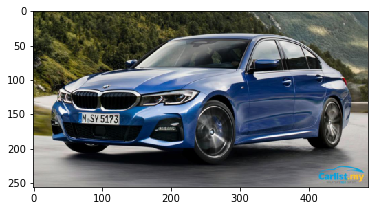

In [ ]:
imshow(process_image(data_dir + 'bmw 3 2019'))

In [ ]:
def predict(image_path, model, topk=5):
    # Implement the code to predict the class from an image file   
    
    # Loading model - using .cpu() for working with CPUs
    loaded_model = load_checkpoint(model).cpu()
    # Pre-processing image
    img = process_image(image_path)
    # Converting to torch tensor from Numpy array
    img_tensor = torch.from_numpy(img).type(torch.FloatTensor)
    # Adding dimension to image to comply with (B x C x W x H) input of model
    img_add_dim = img_tensor.unsqueeze_(0)

    # Setting model to evaluation mode and turning off gradients
    loaded_model.eval()
    with torch.no_grad():
        # Running image through network
        output = loaded_model.forward(img_add_dim)
        
    #conf, predicted = torch.max(output.data, 1)   
    probs_top = output.topk(topk)[0]
    predicted_top = output.topk(topk)[1]
    
    # Converting probabilities and outputs to lists
    conf = np.array(probs_top)[0]
    predicted = np.array(predicted_top)[0]
        
    #return probs_top_list, index_top_list
    return conf, predicted

In [ ]:
# tie the class indices to their names

def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
classes, c_to_idx = find_classes(data_dir+"train")

print(classes, c_to_idx)

['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012

## Step 8: Show the result

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/my_checkpoint1.pth'
image_path = data_dir + 'bmw 3 2010'


conf1, predicted1 = predict(image_path, model_path, topk=5)

print(conf1)
print(classes[predicted1[0]])


[6.145426  5.573008  4.5415072 4.4906116 3.4744375]
Acura Integra Type R 2001


In [ ]:
# Testing predict function

# Inputs are paths to saved model and test image
model_path = '/content/drive/My Drive/Colab Notebooks/my_checkpoint1.pth'
carname = 'Hyundai Veloster Hatchback 2012'
image_path = data_dir + carname


conf2, predicted1 = predict(image_path, model_path, topk=5)
# Converting classes to names
names = []
for i in range(5):
  
    names += [classes[predicted1[i]]]

# Creating PIL image
image = Image.open(image_path+'.jpg')

# Plotting test image and predicted probabilites
f, ax = plt.subplots(2,figsize = (6,10))

ax[0].imshow(image)
ax[0].set_title(carname)

y_names = np.arange(len(names))
ax[1].barh(y_names, conf2/conf2.sum(), color='darkblue')
ax[1].set_yticks(y_names)
ax[1].set_yticklabels(names)
ax[1].invert_yaxis() 

plt.show()

In [ ]:
def plot_solution(cardir, model):
  # Testing predict function

  # Inputs are paths to saved model and test image
  model_path = '/content/drive/My Drive/Colab Notebooks/my_checkpoint1.pth'
  image_path = test_dir + cardir
  carname = cardir.split('/')[1]

  conf2, predicted1 = predict(image_path, model_path, topk=5)
  # Converting classes to names
  names = []
  for i in range(5):
  
      names += [classes[predicted1[i]]]


  # Creating PIL image
  image = Image.open(image_path+'.jpg')

  # Plotting test image and predicted probabilites
  f, ax = plt.subplots(2,figsize = (6,10))

  ax[0].imshow(image)
  ax[0].set_title(carname)

  y_names = np.arange(len(names))
  ax[1].barh(y_names, conf2/conf2.sum(), color='darkblue')
  ax[1].set_yticks(y_names)
  ax[1].set_yticklabels(names)
  ax[1].invert_yaxis() 

  plt.show()

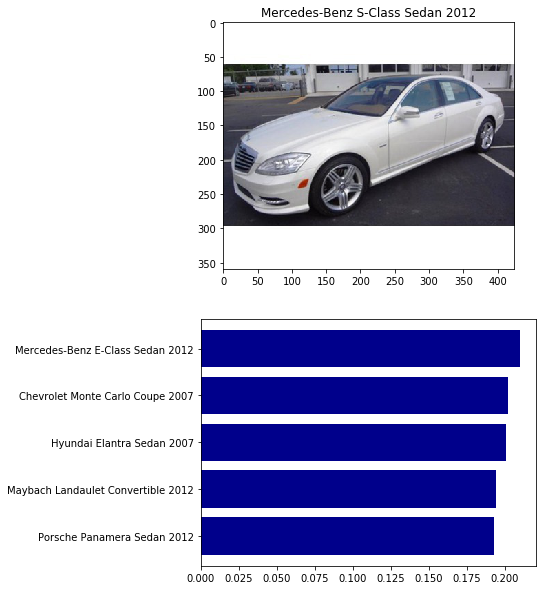

In [ ]:
cardir='/Mercedes-Benz S-Class Sedan 2012/06543'
plot_solution(cardir, model)

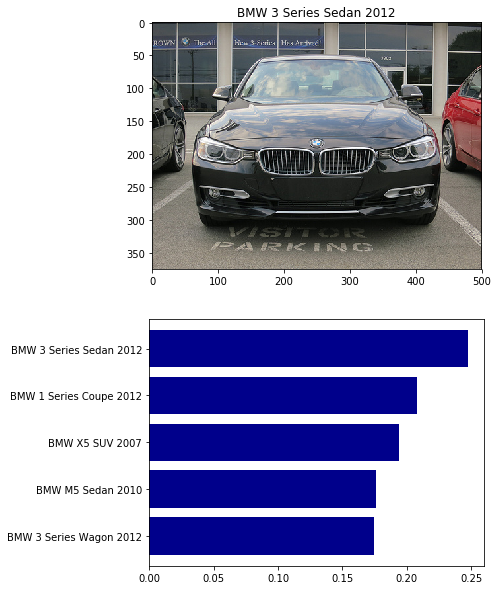

In [ ]:
cardir='/BMW 3 Series Sedan 2012/06582'
plot_solution(cardir, model)

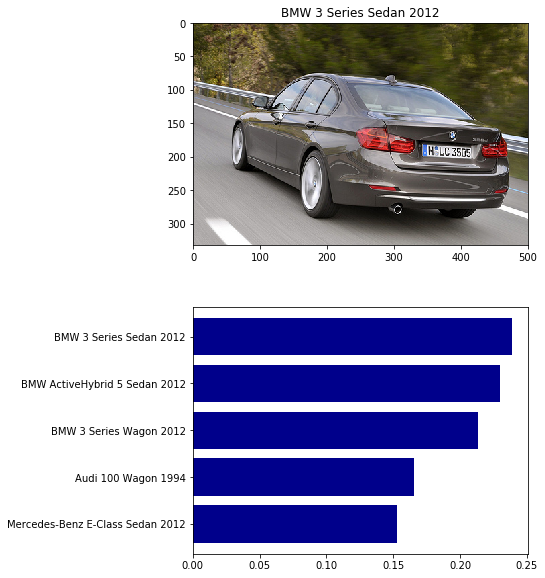

In [ ]:
cardir='/BMW 3 Series Sedan 2012/06544'
plot_solution(cardir, model)

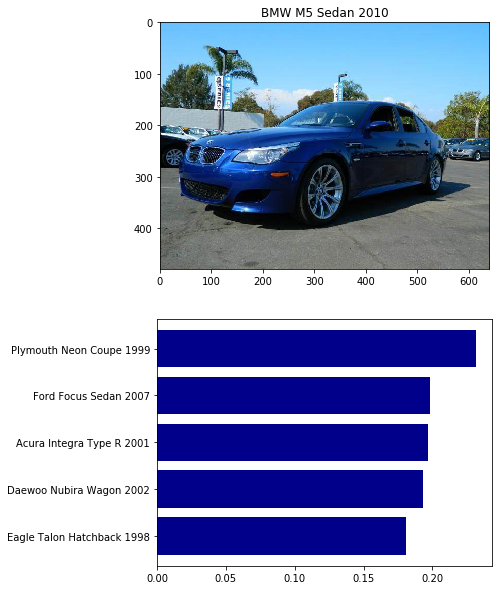

In [ ]:
cardir='/BMW M5 Sedan 2010/03529'
plot_solution(cardir, model)

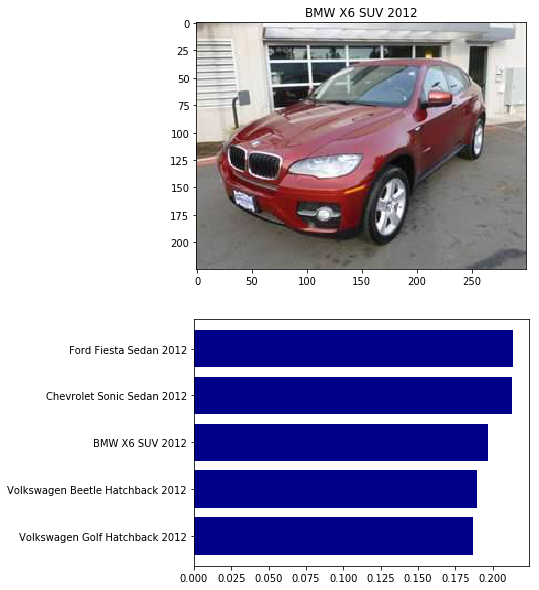

In [ ]:
cardir='/BMW X6 SUV 2012/02891'
plot_solution(cardir, model)

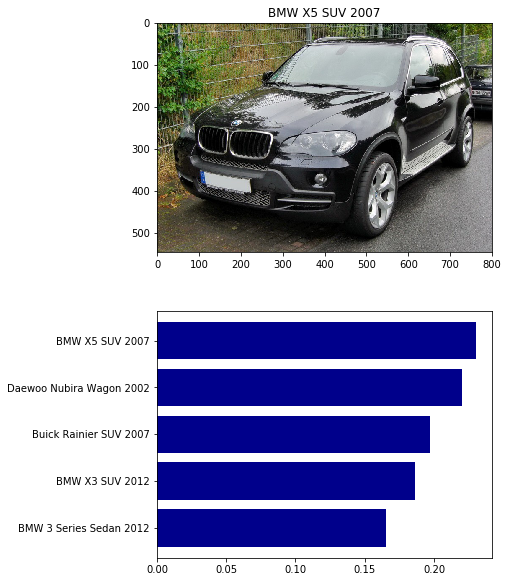

In [ ]:
cardir='/BMW X5 SUV 2007/03310'
plot_solution(cardir, model)

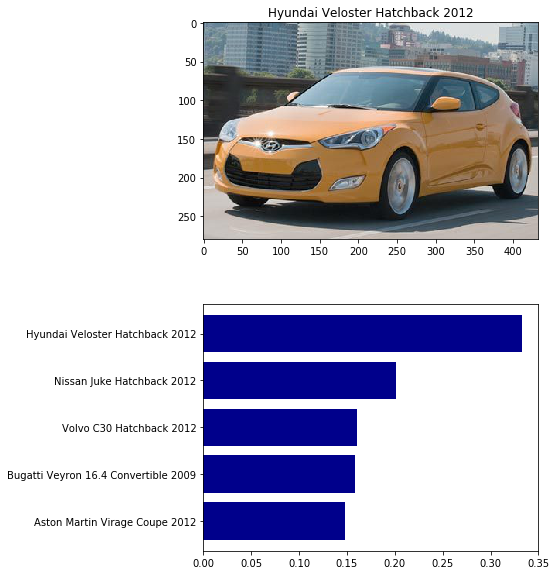

In [ ]:
cardir='/Hyundai Veloster Hatchback 2012/06652'
plot_solution(cardir, model)

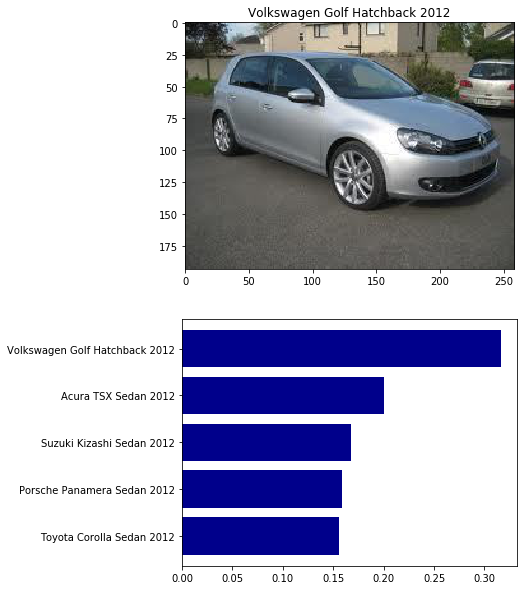

In [ ]:
cardir='/Volkswagen Golf Hatchback 2012/06875'
plot_solution(cardir, model)